# Handling Outliers

### WHich Machine Learning Models are Sensitive to outliers.

Naivye Bayes Classifier--- Not Sensitive To Outliers<br>
SVM-------- Not Sensitive To Outliers<br>
Linear Regression---------- Sensitive To Outliers<br>
Logistic Regression------- Sensitive To Outliers<br>
Decision Tree Regressor or Classifier---- Not Sensitive<br>
Ensemble(RF,XGboost,GB)------- Not Sensitive<br>
KNN----------------- Not Sensitive (outliers may affect result if k value is very very high)<br>
Kmeans------------------------ Sensitive<br>
Hierarichal------- Sensitive<br>
Neural Networks-------- sensitive<br>
PCA---------Very Very sensitive<br>

Note : Al unsupervised ML techniques are sensitive to outliers.

In [1]:
import pandas as pd
df=pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df['Age'].isnull().sum()

177

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline


c:\new folder\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age without NAN')

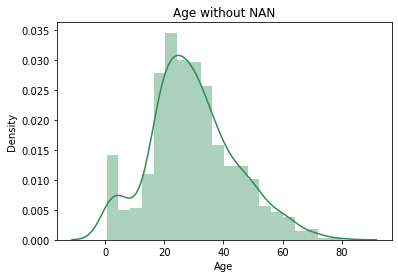

In [7]:
sns.distplot(df['Age'].dropna(),color='seagreen')
plt.title('Age without NAN')

c:\new folder\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age with 100 in NAN')

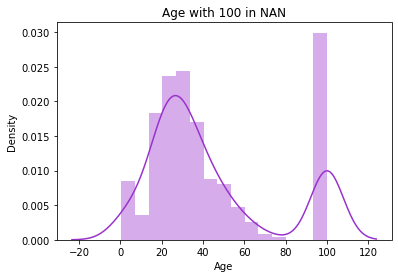

In [9]:
# filling 100 in NAN VALUES
sns.distplot(df['Age'].fillna(100),color='darkorchid')
#making outlier
plt.title('Age with 100 in NAN')

### Gaussian Distributed

Text(0, 0.5, 'No of passenger')

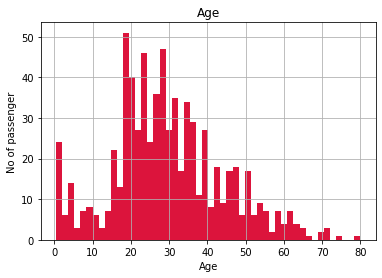

In [14]:
figure=df.Age.hist(bins=50,color='crimson')
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

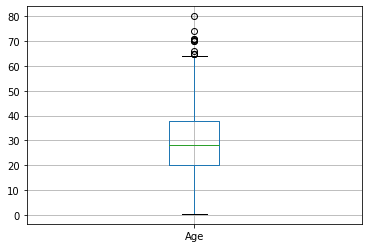

In [15]:
figure=df.boxplot(column="Age")

In [16]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

#### If The Data Is Normally Distributed We use this

In [17]:
##### Assuming Age follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers

uppper_boundary=df['Age'].mean() + 3* df['Age'].std()
lower_boundary=df['Age'].mean() - 3* df['Age'].std()
print(lower_boundary), print(uppper_boundary),print(df['Age'].mean())

-13.880374349943303
73.27860964406094
29.69911764705882


(None, None, None)

#### If Features Are Skewed We Use the below Technique

When our data is skewed we use the extreme outliers

<img src='IQR.jpeg'>

Text(0, 0.5, 'No of passenger')

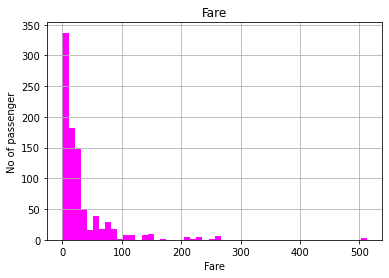

In [18]:
figure=df.Fare.hist(bins=50,color='magenta')
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

<AxesSubplot:>

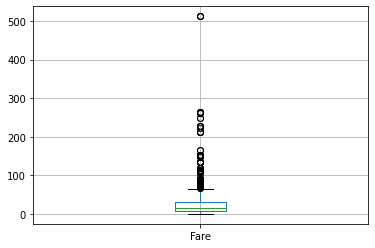

In [19]:
df.boxplot(column="Fare")

In [20]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [21]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR=df.Fare.quantile(0.75)-df.Fare.quantile(0.25)

In [22]:
lower_bridge=df['Fare'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-26.724
65.6344


(None, None)

In [23]:
#### for Extreme corner bounderies /extreme ouliers
lower_bridge=df['Fare'].quantile(0.25)-(IQR*3)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-61.358399999999996
100.2688


(None, None)

In [24]:
dt=df.copy()

In [26]:
# replacing outliers with the highest possible value
dt.loc[dt['Age']>=73,'Age']=73 

In [27]:
# replacing outliers with the highest possible value
dt.loc[dt['Fare']>=100,'Fare']=100    

Text(0, 0.5, 'No of passenger')

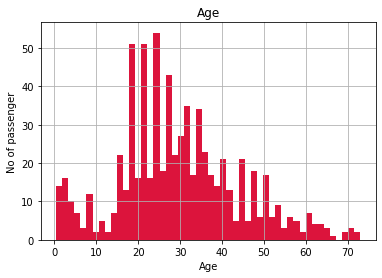

In [29]:
figure=dt.Age.hist(bins=50,color='crimson')
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

######  now u can see that ur distributuion of Age is from 0-73

Text(0, 0.5, 'No of passenger')

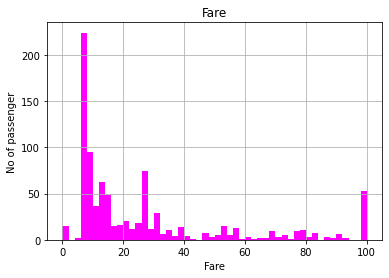

In [30]:
figure=dt.Fare.hist(bins=50,color='magenta')
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

###### now u can see that ur distributuion of Fare is from 0-100

#### Now Apply ML Algorithm :

In [32]:
x=dt[['Age','Fare']].fillna(0)

y=dt['Survived']

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [34]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression() #making object of logistic regression
classifier.fit(X_train,y_train) # fitting the data toalgorithm
y_pred=classifier.predict(X_test)# Making Prediction with algo
y_pred1=classifier.predict_proba(X_test)

In [35]:
from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.6902985074626866
roc_auc_score: 0.757336018411968
